In [263]:
# New age insurance company(Whether the person will will take insurance or not)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/train.csv',usecols=['age','job','marital','education_qual','day','mon','dur','y'])
# separate into input and output columns
X = df.iloc[:, 0:-1].astype(str)
y = df.iloc[:, -1].astype(str)


In [264]:
df.isnull().sum()
df.dropna(how='all', inplace=True)
df.drop_duplicates(inplace=True)
df.describe()

,age,day,dur
count,45153.000000,45153.000000,45153.000000
mean,40.940026,15.807898,258.297477
std,10.621904,8.323798,257.636216
min,18.000000,1.000000,0.000000
25%,33.000000,8.000000,103.000000
50%,39.000000,16.000000,180.000000
75%,48.000000,21.000000,319.000000
max,95.000000,31.000000,4918.000000


In [265]:
#Encode the taret variable
from sklearn.preprocessing import LabelEncoder
label_y = LabelEncoder()
target_variable = label_y.fit_transform(y)
y = target_variable
y.dtype


dtype('int64')

In [249]:
pip install category_encoders

In [266]:
import category_encoders as ce
data = X['mon']
encoder= ce.OrdinalEncoder(cols=['mon'],return_df=True, mapping=[{'col':'mon', 'mapping':{'may':5,'jun':6,'jul':7,'aug':8,'oct':10,'nov':11,'dec':12,'jan':1,'feb':2,'mar':3,'apr':4,'sep':9}}])
X['mon']  = encoder.fit_transform(data)
X['mon']

0         5
1         5
2         5
3         5
4         5
         ..
45206    11
45207    11
45208    11
45209    11
45210    11
Name: mon, Length: 45211, dtype: int64

In [267]:
from sklearn.preprocessing import OrdinalEncoder
education_column = X[["education_qual"]]

encoder = OrdinalEncoder().set_output(transform="pandas")
education_encoded = encoder.fit_transform(education_column)
X.education_qual = education_encoded
X.education_qual.astype(str).astype(float)


0        2.0
1        1.0
2        1.0
3        3.0
4        3.0
        ... 
45206    2.0
45207    0.0
45208    1.0
45209    1.0
45210    1.0
Name: education_qual, Length: 45211, dtype: float64

In [268]:

from sklearn.preprocessing import OneHotEncoder
data = X[["education_qual"]]
encoder1 = OneHotEncoder(sparse_output=False)
# transform data
job_encoder = encoder1.fit_transform(data)
X.job = job_encoder
X.job.astype(str).astype(float)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
45206    0.0
45207    1.0
45208    0.0
45209    0.0
45210    0.0
Name: job, Length: 45211, dtype: float64

In [269]:
data = X[["marital"]]
from sklearn.preprocessing import LabelEncoder
label_marital = LabelEncoder()
marital_encoded = label_marital.fit_transform(data)
X.marital = marital_encoded

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [270]:
#Scaling
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
standard_scaler.fit(X)
scaled_dataset = pd.DataFrame(standard_scaler.transform(X),columns= X.columns )
print(" Now, every feature is scaled ")



 Now, every feature is scaled 


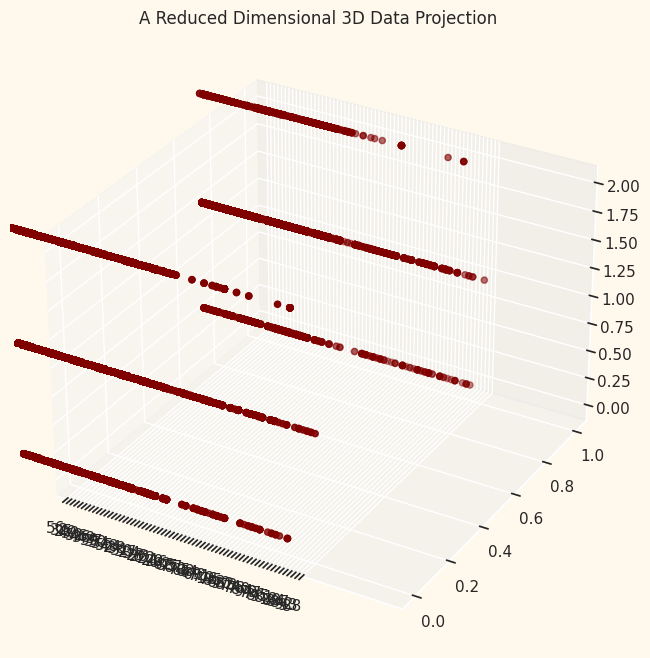

In [271]:
#A Reduced Dimensional 3D Data Projection
A=X['age']  #age','job','marital','education_qual','day','mon','dur'
B =X['job']
C =X['marital']
# To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(A,B,C, c="maroon", marker="o" )
ax.set_title("A Reduced Dimensional 3D Data Projection")
plt.show()

In [257]:
# split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)



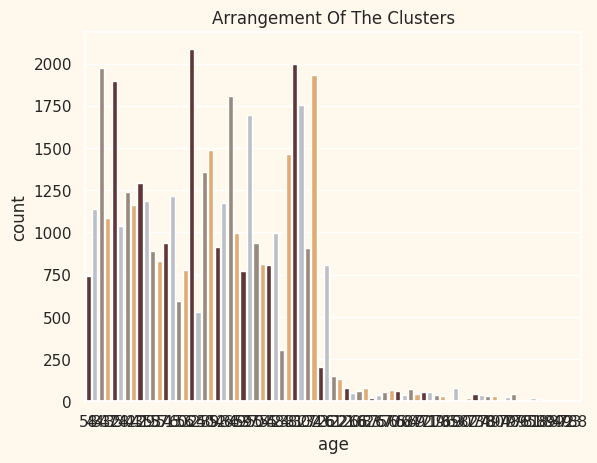

In [275]:
#Plotting countplot of clusters
F = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=X['age'], palette = F)
pl.set_title("Arrangement Of The Clusters")
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Numerical columns
num_col_ = [col for col in X.columns if X[col].dtype != 'object']
x1 = X
# learning the statistical parameters for each of the data and transforming
x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()

In [276]:
# define the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [277]:
from sklearn.metrics import accuracy_score
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 88.97
